# Tarea 4

**Envío del PR inicial:** viernes 28 de septiembre

**Aceptación del PR:** martes 9 de octubre

In [1]:
using Plots
gr(grid=false)

Plots.GRBackend()

## 1

Para el mapeo $Q_c(x) = x^2 + c$, ¿cuál es el dominio $\cal{D}\subset \mathbb{R}$ de $Q_c(x)$ tal que la órbita generada por una condición inicial $x_0\in \cal{D}$ *no* escapa a infinito a ningún tiempo?

In [2]:
"""
mapeo(f,xo,n)  
f: es una función f(x) arbitraria
xo: condición inicial
n: número de iteraciones
"""
function mapeo(f,xo,n)
    X = [xo]
    for i in 1:n
        xo = f(xo)
        push!(X,xo)
    end
    return xo
end

mapeo

In [3]:
"""
La función `gráfica(f,xo,n,a,b)` mapea en 2D la órbita de la función f(x)
a partir de la condición inicial `x_o`, un número `n` de iteraciones, en el intervalo (a,b)
"""
function gráfica(f,xo,n, a, b)
    rango_xo = a:1/32:b
    
    R = []
    for i in 1:length(rango_xo)
        push!(R,f(rango_xo[i]))
    end
    
    min = minimum(R)
    max = maximum(R)
    
    plot(rango_xo, f,
        xaxis=("x", (a, b)), 
        yaxis=((min-abs(min)/3, max+abs(max)/3), "F(x)"), legend = false, title = "F(x)", grid = false)
    plot!(rango_xo, x->x, color = :red)
    
    X = [xo,xo]
    Y = [min-abs(min)/3]
    
    for i in 1:n
        push!(X, mapeo(f,xo,i))
        push!(X, mapeo(f,xo,i))
        push!(Y, mapeo(f,xo,i))
        push!(Y, mapeo(f,xo,i))
    end
    pop!(X)
    
    plot!(X,Y, line = (:green, :path, 2.0, :dot), marker=(:dot, 0.5))
end

function gráfica!(f,xo,n, a, b)         #Para agregar más órbitas a la misma gráfica.
    
    rango_xo = a:1/32:b
    
    R = []
    for i in 1:length(rango_xo)
        push!(R,f(rango_xo[i]))
    end
    
    min = minimum(R)
    
    X = [xo,xo]
    Y = [min-abs(min)/3]
    
    for i in 1:n
        push!(X, mapeo(f,xo,i))
        push!(X, mapeo(f,xo,i))
        push!(Y, mapeo(f,xo,i))
        push!(Y, mapeo(f,xo,i))
    end
    pop!(X)
    
    plot!(X,Y, line = (:path, 2.0, :dot), marker=(:dot, 0.5))
end

gráfica! (generic function with 1 method)

In [4]:
Qc(x,c) = x^2 + c       # Mapeo cuadrático

qc1 = x -> Qc(x, -0.5)   # Mapeo cuadrático con c =  -0.5
qc2 = x -> Qc(x, -0.25)  # Mapeo cuadrático con c = 0.25
qc3 = x -> Qc(x, -2.1)  # Mapeo cuadrático con c =  -3.0
qc4 = x -> Qc(x, 0.25)  #Mapeo cuadrático con c = -1.4

#11 (generic function with 1 method)

In [5]:
p_m = 1/2*(1+sqrt(1-4*0.25))

0.5

In [ ]:
gráfica(qc4, -0.55, 20, -1,1)
gráfica!(qc4, -0.4, 5, -3,3)
gráfica!(qc4, 0.4, 15, -1,1)
gráfica!(qc4, -p_m, 1, -1,1)

Tenemos tres casos para el dominio de la condición incial, en función de $c$, tal que la órbita no escapa a infinito.

Para $c > 1/4$:la órbita escapa a infinito para toda condición inicial $x_0$

Para $-2 < c <= 1/4$:

Si la condición inicial cumple que $|x_0| > p_+(c)$ entonces la órbita diverge a $+\infty$

Si la condición inicial es tal que $|x_0| = p_+(c)$, la órbita es $\textit{eventualmente fija}$

Si la condición inicial es tal que $|x_0| < p_+(c)$, la órbita se queda encerrada en el intervalo $[-p_+(c),p_+(c)]$ (no escapa a infinito). Esto no nos dice cuántos puntos atractores tiene la órbita, si son fijos, o de periodo $n$. 

In [ ]:
p_m1 = 1/2*(1+sqrt(1-4*-0.5))

In [ ]:
gráfica(qc1, -1.0, 20, -1.5,1.5)
gráfica!(qc1, 0.0, 5, -1.5,1.5)
gráfica!(qc1, -1.4, 2, -1.5,1.5)
gráfica!(qc1, -p_m1, 1, -1.5,1.5)

Para $c < 2$, no es fácil determinar si hay dominio de no divergencia para las condiciones iniciales.


In [ ]:
p_m2 = 1/2*(1+sqrt(1-4*-2.1))
gráfica(qc3, -0.55, 10, -3,3)
gráfica!(qc3, -0.3, 13, -3,3)
gráfica!(qc3, 0.4, 12, -3,3)
gráfica!(qc3, -p_m2, 1, -3,3)

## 2

- Obtengan el diagrama de bifurcación que se muestra en la Fig. 2 del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial.

- Caractericen la cuenca de atracción de $p_-(c)$ cuando el punto es estable.


In [ ]:
function bifurcación(f, c,xo,it)
    C = []
    X = []

    for a in c
        for i in 1:it
            xo = f(xo,a)
        end
        push!(X,xo)
        push!(C,a)   
    end
    
    plot(C,X, xaxis = ("c", (c[end],c[1])), yaxis = ("X_$it"), legend=false, title="x^2+c", color=:blue)
end

In [ ]:
bifurcación((x,a)->x^2+a,0.25:-0.01:-1.0, 0.5,100000)
plot!(-1.0:0.01:0.25,x->1/2*(1-sqrt(1-4*x)), line = (:dash), label="p_(c)")

### Cuenca de atracción

El punto $p_-(c)$ es estable cuando $-3/4<c<1/4$ y su cuenca de atracción es $|x_0| < p_+(c)$

## 3

Para el mapeo $F_\lambda(x) = \lambda x(1-x)$, ¿qué podemos decir de la bifurcación que ocurre en $\lambda_0=1$? ¿Es o no una bifurcación de silla-nodo?

In [ ]:
gráfica(x->2.0*x*(1-x),0.5,4,-1,1)
plot!(-1:1/32:1,x->2.0*x*(1-x))
plot!(-1:1/32:1,x->1.0*x*(1-x))
plot!(-1:1/32:1,x->0.1*x*(1-x))

Para $\lambda \neq 1$ tenemos siempre dos puntos fijos, por tanto la bifurcación no es de silla-nodo, pues nunca se aniquilan los puntos fijos.

## 4

- Obtengan numéricamente el diagrama de bifurcación del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial en el intervalo de parámetros $-2<c<1/4$. Para esto se necesita iterar un gran número de veces (hasta llegar al ciclo periódico) condiciones iniciales, y repetir esto para *muchos* valores de $c$ en el intervalo. Vale la pena hacer notar que, si hay ciclos periódicos, *a priori* no conocen su periodicidad.

- Para ciertos valores de $c$ característicos, muestren el análisis gráfico del mapeo $Q_c(x)$ a fin de entender los resultados.


In [ ]:
function bifurcación1(f, c,xo,it)
    C = []
    X = [[],[],[],[]]
    x1 = xo
    for a in c
        for j in 1:4
            for i in 1:it-j+1
                x1 = f(x1,a)
            end
            push!(X[j],x1)
        end
        push!(C,a)   
    end
    
    scatter(C,X[1], xaxis = ("c", (c[end],c[1])), yaxis = ("X_$it"), legend=false, title="x^2+c", markersize=0.05, color=:blue)
    scatter!(C,X[2], markersize=0.05, color=:blue)
    scatter!(C,X[3], markersize=0.05, color=:blue)
    scatter!(C,X[4], markersize=0.05, color=:blue)
end

In [ ]:
bifurcación1((x,a)->x^2+a,0.25:-0.0001:-2.0, 0.5,1000)

In [ ]:
f1 = x -> Qc(x, -2.0)
f2 = x -> Qc(x, -1.4)
f3 = x -> Qc(x, -0.8)

In [ ]:
gráfica(f1,0.95,200,-2.5,2.5)

In [ ]:
gráfica(f2,1.5,400,-1.6,1.5)

Se nota que para $c=-2$, la órbita es densa en el intervalo.

Para $c=-1.4$, se pueden ver varios puntos fijos en la órbita, no escapa a infinito.

El diagrama de bifurcación nos muestra entonces el número de puntos fijos y los puntos fijos del mapeo, dependiendo de $c$.

Pero la presición depende de el número de iteraciones.

## 5

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos últimos incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto tenga una estabilidad neutra, i.e., no sea no atractivo ni repulsivo?

En los dos últimos incisos, el interés está en los ciclos de periodo 2.

In [6]:
F_1(x) = x^2 + 0.25
F_2(x) = 3*x*(1-x)  #0 2/3
F_3(x) = exp(x-1)
F_4(x) = (x^2-1.25)^2-1.25
F_5(x) = exp(x+1)

F_5 (generic function with 1 method)

In [74]:
function distancia1(f,p,n)
    D = []
    N = []
    xo = p + rand() - 1
    for i in 1:n
        xo = f(xo)
        d = abs(xo - p)
        push!(D,log(10,d))
        push!(N,i)
    end
    plot(N,D, color=:blue, xaxis = ("n"), yaxis=("log(d)"), legend=false)
end

distancia1 (generic function with 3 methods)

Las derivada de la función $F_1 = x^2+1/4$ en el punto atractivo:

$F_1'(0.5) = 1$  la convergencia se muestra en la siguiente gráfica.

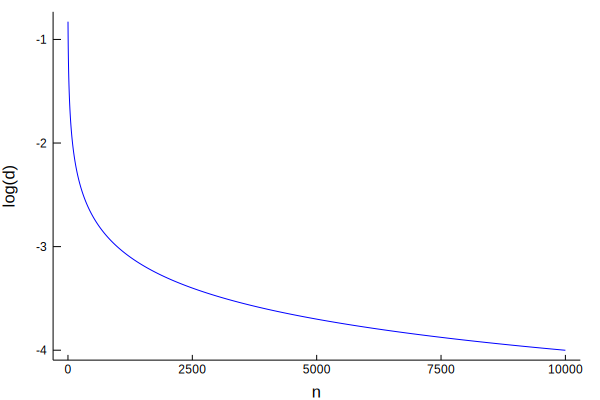

In [75]:
distancia1(F_1, 0.5, 10000)

Para $F_2=3x(1-x)$, la derivada en el punto fijo:

$F_2'(2/3) = -1$  convergencia en la siguiente gráfica.

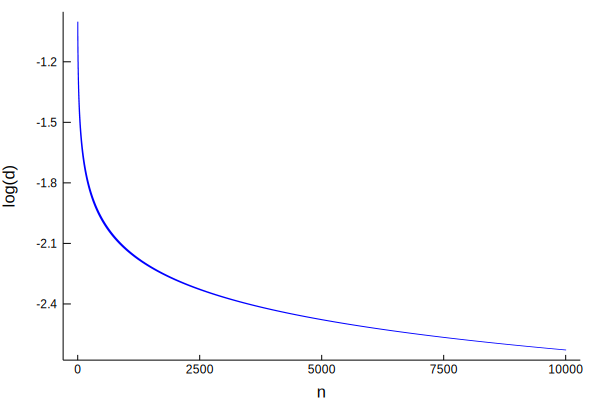

In [78]:
distancia1(F_2, 2/3, 10000)

Para $F_3 = e^{x-1}$, la derivada en el punto fijo:

$F_3'(1) = 1$   convergencia en la curva roja.

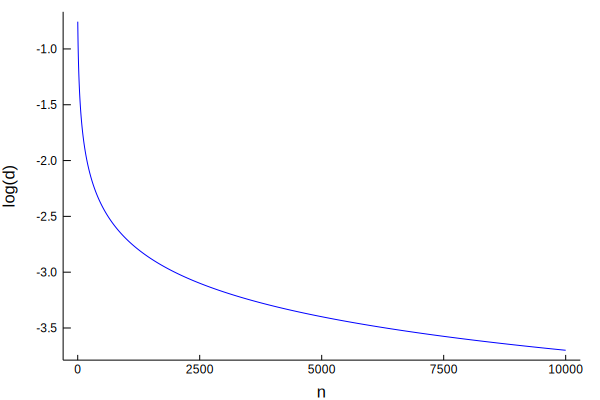

In [79]:
distancia1(F_3, 1, 10000)

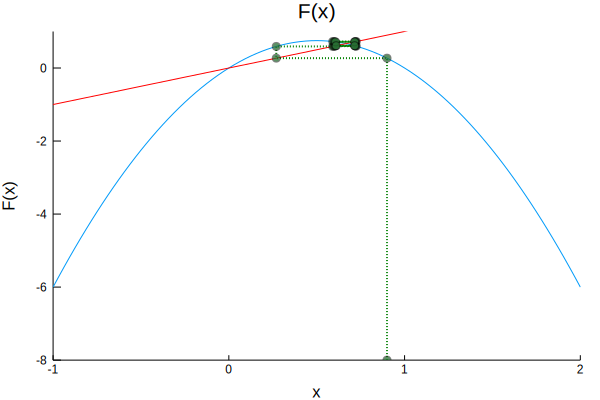

In [83]:
gráfica(F_2, 0.9,10, -1,2)

La derivada da información sobre cómo es la convergencia al punto fijo atractivo $x_a$.

Si $f'(x_a)<0$ la convergencia se da de manera alterna en sucesión de puntos a la izquierda y derecha del punto fijo. Esta puede ser la razón de que la convergencia sea más lenta para la función $3x(1-x)$ que cuando la derivada $1>f'(x_a)>0$, como en el caso de las otras dos funciones, en los que la convergencia se da ya sea por la derecha o por la izquierda del punto fijo (dos gráficas siguientes). Hay que tener cuidado con los puntos fijos de éstas funciones ya que dependiendo del valor de la condición inicial, habrá o no convergencia.

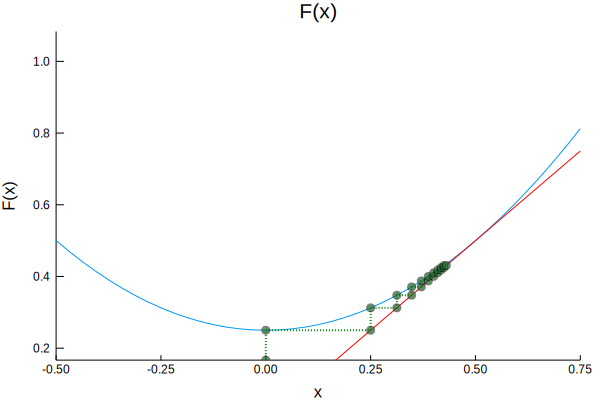

In [97]:
p1 = gráfica(F_1, 0.0, 10, -0.5,0.75)

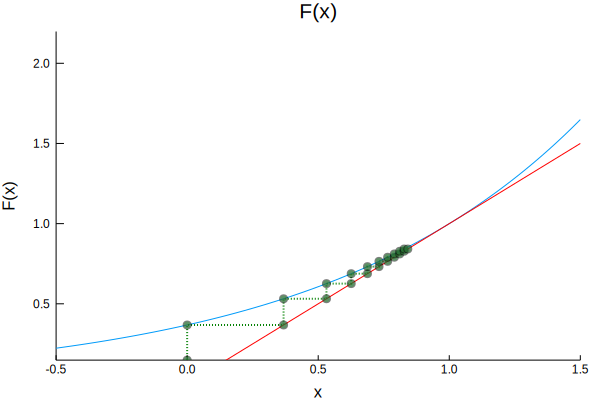

In [98]:
p2 = gráfica(F_3, 0.0, 10, -0.5, 1.5)

Ahora, la función $F_4 = x^2 -1.25$ 

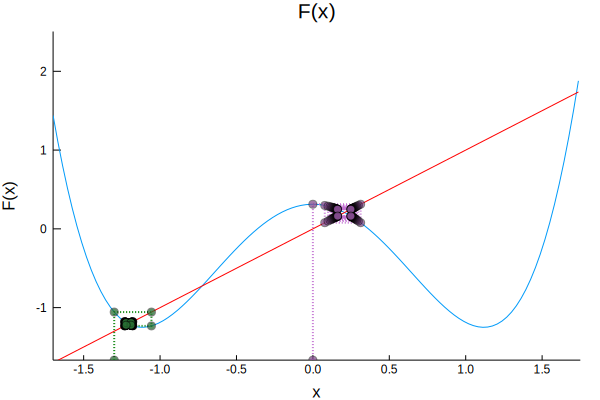

In [142]:
gráfica(x->(x^2-1.25)^2-1.25, -1.3, 40, -1.7,1.75)
gráfica!(x->(x^2-1.25)^2-1.25, -0.0, 40, -1.7,1.75)

In [149]:
p_1 = -1.0
p_2 = 0.0
for i in 1:100000000
    p_1 = F_4(p_1)
    p_2 = F_4(p_2)
end
p_1, p_2

(-1.207118882238662, 0.20707756459665183)

Obervamos que el mapeo $x^2-1.25$ tiene puntos de periodo dos.

Los cuáles son $p_1=-1.207118882238662$ y $p_2=0.20707756459665183$

La derivada de la función $F_4^2$ en tales puntos:

$F_4^2$$'(p_1)=-1.000151084$ y $F_4^2$$'(p_2)=-0.9998...$

La órbita converge en ambos puntos de manera alterna, lo cuál nos indica que la derivada en ambos es de hecho menor a 1 (en valor absoluto) si no, no convergería (derivada mayor a 1) o lo haría solo por un lado (derivada igual a 1).

Lo órbita converge ligeramente más rápido al punto $p_1$, puede verse ésto en las dos gráficas siguientes y en la gráfica anterior. Ésto es porque la derivada debe ser menor en valor absoluto a la de $p_2$.

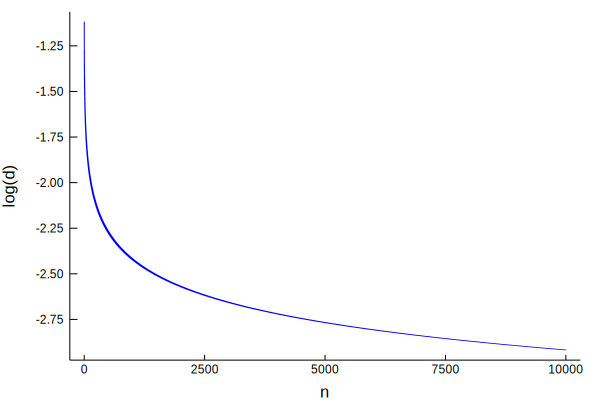

In [144]:
p_1 = -1.207107
distancia1(F_4, p_1, 10000)

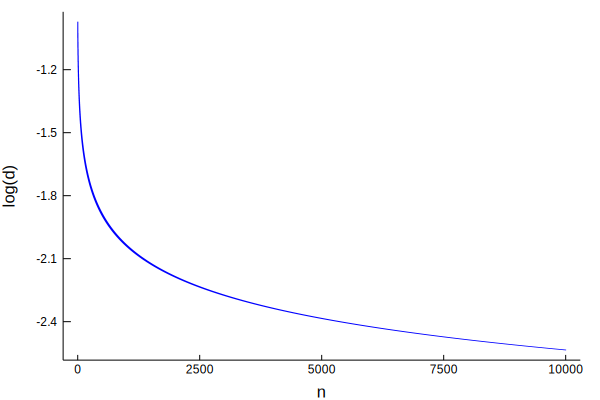

In [146]:
p_2 = 0.207107
distancia1(F_4,p_2,10000)

Para la función $F_5=e^{x+1}$, no hay ningún punto fijo. Por tanto no hay análisis qué hacer para esta función.

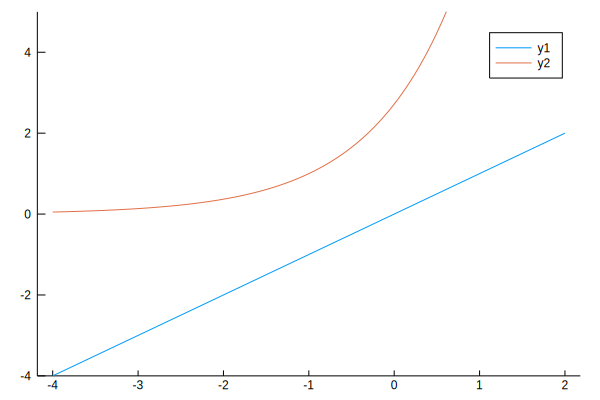

In [152]:
plot(-4:0.001:2,x->x)
plot!(-4:0.001:2, x->exp(x+1), ylims=(-4,5))